In [18]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
sns.set()

In [2]:
!curl ipecho.net/plain

113.110.231.98

In [3]:
headers = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64; rv:10.0) Gecko/20100101 Firefox/10.0'})

In [4]:
anjuke = 'https://shenzhen.anjuke.com/sale/p25/'
response = get(anjuke,headers=headers)

In [5]:
print(response)

<Response [200]>


In [6]:
print(response.text[:1000])

     <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html>
<head>

<META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=UTF-8">
<META NAME="format-detection" CONTENT="telephone=no" />
<meta name="location" content="province=广东;city=深圳;coord=114.066793,22.549792">
<meta name="mobile-agent" content="format=html5; url=https://m.anjuke.com/sz/sale/" />
<link rel="alternate" media="only screen and(max-width: 640px)" href="https://m.anjuke.com/sz/sale/">
<title>深圳二手房房产网，深圳二手房交易信息，深圳二手房出售 - 58安居客</title><meta name="keywords" content="深圳二手房，深圳房产网，深圳二手房交易信息，深圳二手房出售 - 58安居客房产"/>
<meta name="description" content="安居客深圳二手房网，为您提供深圳二手房出售，二手房房屋买卖交易信息；深圳地图，商圈，地铁找房，二手房房源信息，请访问安居客深圳房产网"/>
<meta name="apple-itunes-app" content="app-id=527806786" />
<link href="https://shenzhen.anjuke.com/sale/p25/" rel="canonical">
<link rel="alternate" media="only screen and(max-width: 640px)" href="https://m.anjuke.com/sz/sale/">

<meta name="baidu-site-verification" c

In [7]:
html_soup = BeautifulSoup(response.text,'html.parser')

In [8]:
house_containers = html_soup.find_all('li',class_='list-item')

In [9]:
house_containers[0]

<li class="list-item" data-from="">
<div class="item-img">
<img height="135" src="https://pic1.ajkimg.com/display/hj/430efca8534793eb918de6933b82a36f/240x180c.jpg?t=1" width="180"/>
<div class="icon-wrapper">
<i class="icon-video-new"></i>
<i class="icon-720"></i>
</div>
</div>
<div class="house-details">
<div class="house-title">
<a class="houseListTitle " data-company="" data-from="" href="https://shenzhen.anjuke.com/prop/view/A1625815531?from=filter&amp;spread=commsearch_p&amp;position=1441&amp;kwtype=filter&amp;now_time=1555136216" target="_blank" title="招商花园精装三房 实验学位 坪山高铁旁 业主急售">
                招商花园精装三房 实验学位 坪山高铁旁 业主急售</a>
<i class="house-icon house-icon-anxuan" style="font-weight: normal;">安选</i>
<i class="house-icon house-icon-default border-line">
                        真实在售                    </i>
</div>
<div class="details-item">
<span>3室2厅</span><em class="spe-lines">|</em><span>89m²</span><em class="spe-lines">|</em><span>中层(共33层)</span><em class="spe-lines">|</em><span>2

In [0]:
re.search('\d+',house_containers[0].find_all('span',class_='unit-price')[0].text)[0]

'31869'

In [10]:
house_containers[0].find_all('span',class_='comm-address')[0].text.replace('\xa0','').split()

['招商花园城', '坪山-坪山-行政五路']

In [11]:
house_containers[0].find_all('div',class_='details-item')[0].text.strip().replace('\ue147','|').split('|')

['3室2厅', '89m²', '中层(共33层)', '2015年建造', '沙玲怡']

In [15]:
re.search('\d+','89m²')[0]

'89'

In [13]:
created = []
unit_prices = []
total_prices = []
areas = []
constructs = []
floors = []
dates = []
re_names = []
zones = []
descriptions = []
urls = []

In [19]:
%%time
n_page = 0
for page in range(0,50):
    n_page += 1
    url = 'https://shenzhen.anjuke.com/sale/p' + str(n_page)
    r = get(url,headers=headers)
    page_html = BeautifulSoup(r.text,'html.parser')
    house_containers = page_html.find_all('li',class_='list-item')
#     print(page_html)
    if house_containers != []:
        for container in house_containers:
            #price
            total_price = float(container.find_all('strong')[0].text) * 10000 
            unit_price = int(re.search('\d+',container.find_all('span',class_='unit-price')[0].text)[0])
            unit_prices.append(unit_price)
            total_prices.append(total_price)
            #zone,name
            name,zone = container.find_all('span',class_='comm-address')[0].text.replace('\xa0','').split()
            re_names.append(name)
            zones.append(zone)
            #tags
            con,area,floor,date,_ = container.find_all('div',class_='details-item')[0].text.strip().replace('\ue147','|').split('|')
            constructs.append(con)
            area = int(re.search('\d+',area)[0])
            areas.append(area)
            floors.append(floor)
            dates.append(date)
    else:
        break
    time.sleep(5)

print('Scraped {} pages containing {} properties.'.format(n_page,len(re_names)))

Scraped 50 pages containing 3120 properties.
CPU times: user 10.8 s, sys: 134 ms, total: 10.9 s
Wall time: 5min 25s


In [21]:
shenzhen = pd.DataFrame({'name':re_names,
                                     'zone':zones,'size':areas,'floor':floors,'construct':constructs,'date':date,'unit_price':unit_prices,'total_price':total_prices
                        })

In [22]:
shenzhen

,name,zone,size,floor,construct,date,unit_price,total_price
0,振业峦山谷,龙岗-横岗-宝龙大道81号,89,低层(共32层),3室2厅,2006年建造,31869,2850000.0
1,传麒尚林一期,龙岗-龙岗中心城-丰田路,87,中层(共33层),3室2厅,2006年建造,32996,2900000.0
2,传麒尚林一期,龙岗-龙岗中心城-丰田路,88,中层(共33层),3室1厅,2006年建造,32947,2900000.0
3,传麒尚林一期,龙岗-龙岗中心城-丰田路,87,中层(共32层),3室2厅,2006年建造,32511,2860000.0
4,振业天峦,龙岗-龙岗中心城-宝沙一路1号,88,高层(共33层),3室2厅,2006年建造,31746,2800000.0
5,振业天峦,龙岗-龙岗中心城-宝沙一路1号,89,低层(共33层),3室2厅,2006年建造,32229,2880000.0
6,中骏云景府,龙岗-龙岗中心城-深汕路龙岗段277号,94,低层(共35层),3室2厅,2006年建造,30957,2910000.0
7,海航国兴城,龙岗-龙岗中心城-碧新路,85,高层(共30层),3室2厅,2006年建造,33801,2890000.0
8,龙珠花园,龙岗-布吉关-龙岗大道,89,中层(共31层),3室2厅,2006年建造,32468,2900000.0
9,水晶之城,龙岗-横岗-龙岗大道,80,低层(共6层),3室2厅,2006年建造,35625,2850000.0


In [31]:
shenzhen[shenzhen['unit_price']==4688]

,name,zone,size,floor,construct,date,unit_price,total_price
1500,田心广场,深圳周边-东莞-虎门大道,96,中层(共33层),3室2厅,2006,4688,450000.0


In [33]:
shenzhen['rooms'] = shenzhen['construct'].str.extract('^(\d)')

In [35]:
shenzhen['halls'] = shenzhen['construct'].str.extract('(\d)厅$')

In [40]:
shenzhen = shenzhen[~shenzhen['zone'].str.contains('周边')]

In [41]:
shenzhen

,name,zone,size,floor,construct,date,unit_price,total_price,rooms,halls
0,振业峦山谷,龙岗-横岗-宝龙大道81号,89,低层(共32层),3室2厅,2006,31869,2850000.0,3,2
1,传麒尚林一期,龙岗-龙岗中心城-丰田路,87,中层(共33层),3室2厅,2006,32996,2900000.0,3,2
2,传麒尚林一期,龙岗-龙岗中心城-丰田路,88,中层(共33层),3室1厅,2006,32947,2900000.0,3,1
3,传麒尚林一期,龙岗-龙岗中心城-丰田路,87,中层(共32层),3室2厅,2006,32511,2860000.0,3,2
4,振业天峦,龙岗-龙岗中心城-宝沙一路1号,88,高层(共33层),3室2厅,2006,31746,2800000.0,3,2
5,振业天峦,龙岗-龙岗中心城-宝沙一路1号,89,低层(共33层),3室2厅,2006,32229,2880000.0,3,2
6,中骏云景府,龙岗-龙岗中心城-深汕路龙岗段277号,94,低层(共35层),3室2厅,2006,30957,2910000.0,3,2
7,海航国兴城,龙岗-龙岗中心城-碧新路,85,高层(共30层),3室2厅,2006,33801,2890000.0,3,2
8,龙珠花园,龙岗-布吉关-龙岗大道,89,中层(共31层),3室2厅,2006,32468,2900000.0,3,2
9,水晶之城,龙岗-横岗-龙岗大道,80,低层(共6层),3室2厅,2006,35625,2850000.0,3,2


In [46]:
shenzhen['area'] = shenzhen['zone'].str.extract('(\w+)-')

/Users/liuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/liuyang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


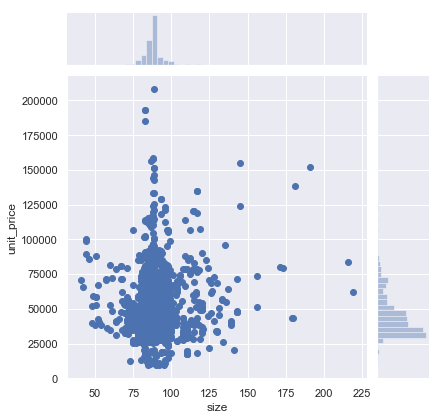

In [42]:
sns.jointplot(x='size',y='unit_price',data=shenzhen)

In [50]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

/Users/liuyang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


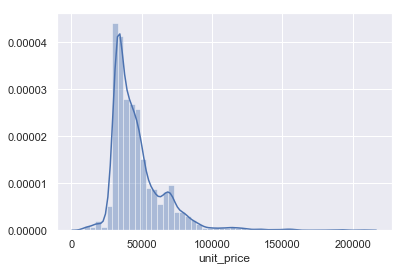

In [43]:
sns.distplot(shenzhen['unit_price'])

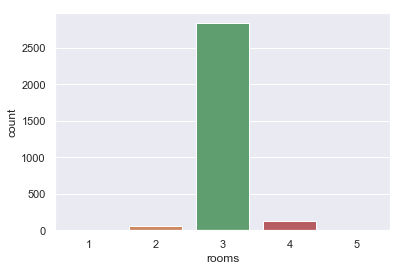

In [44]:
sns.countplot(shenzhen['rooms'])

/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont:

/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont:

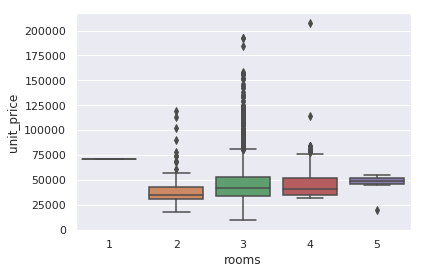

In [60]:
sns.boxplot(x='rooms',y='unit_price',data=shenzhen)

/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont:

/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/liuyang/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont:

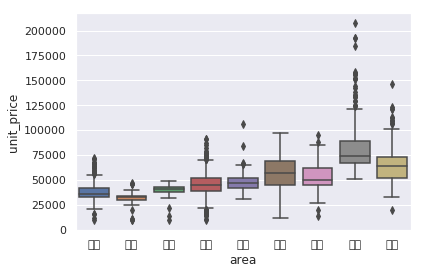

In [61]:
sns.boxplot(x='area',y='unit_price',data=shenzhen)